In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [46]:
df=pd.read_csv(r"C:\Users\SNEHAL\Desktop\data anlyst file\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding= 'unicode_escape')
df.head(10)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [47]:
df.shape

(11251, 15)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [49]:
#drop null columns
df.drop(["Status","unnamed1"],axis=1,inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [51]:
#check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [52]:
#drop null values
df.dropna(inplace=True)
df.shape

(11239, 13)

In [53]:
df["Amount"]=df["Amount"].astype('int')
df["Amount"].dtypes

dtype('int32')

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [55]:
#if we want to change name of column
df.rename(columns={'Gender':'Sex'},inplace = True)
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [57]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#Exporatory Data Analysis

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [59]:
colors = sns.color_palette()[:2]

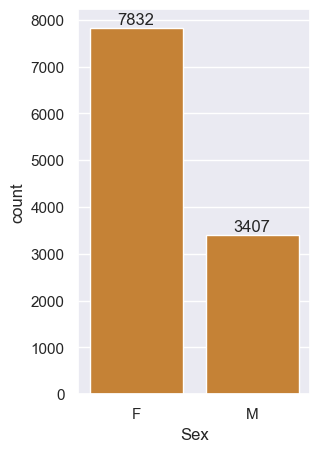

In [60]:
ax=sns.countplot(x='Sex',data=df,color= '#DD831E')
for bars in ax.containers:
    ax.bar_label(bars)

In [61]:
df.groupby(["Sex"], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)


,Sex,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Sex', ylabel='Amount'>

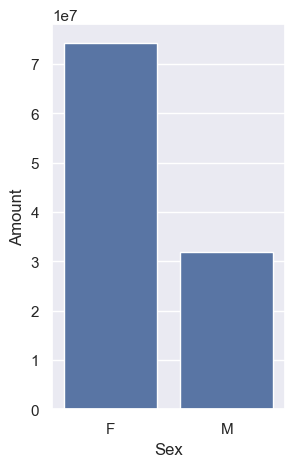

In [62]:
sales_g=df.groupby(["Sex"], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x="Sex",y="Amount",data= sales_g)

#From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

#Age


In [63]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

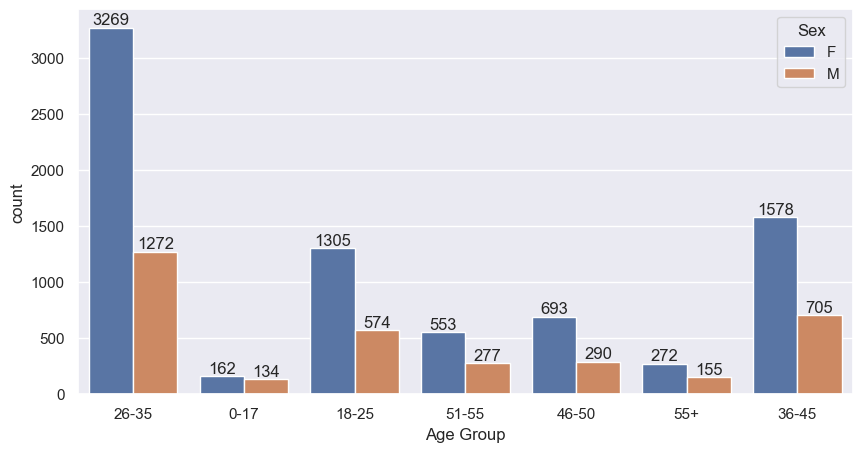

In [102]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df,x='Age Group',hue='Sex')
for bar in ax.containers:
    ax.bar_label(bar)

In [65]:
# Total Amount vs Age Group
sales_age=df.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sales_age

,Age Group,Orders
2,26-35,11395
3,36-45,5687
1,18-25,4650
4,46-50,2371
5,51-55,2112
6,55+,1076
0,0-17,690


<Axes: xlabel='Age Group', ylabel='Orders'>

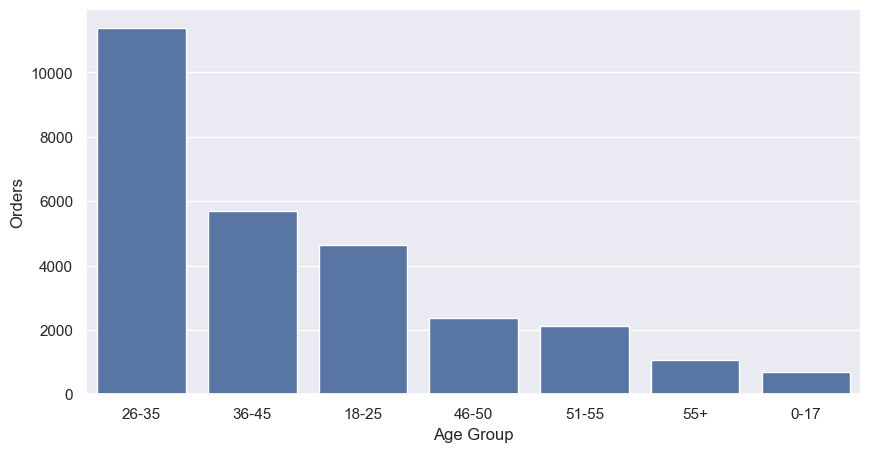

In [101]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Age Group',y='Orders',data=sales_age)

#From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

#State

<Axes: xlabel='State', ylabel='Orders'>

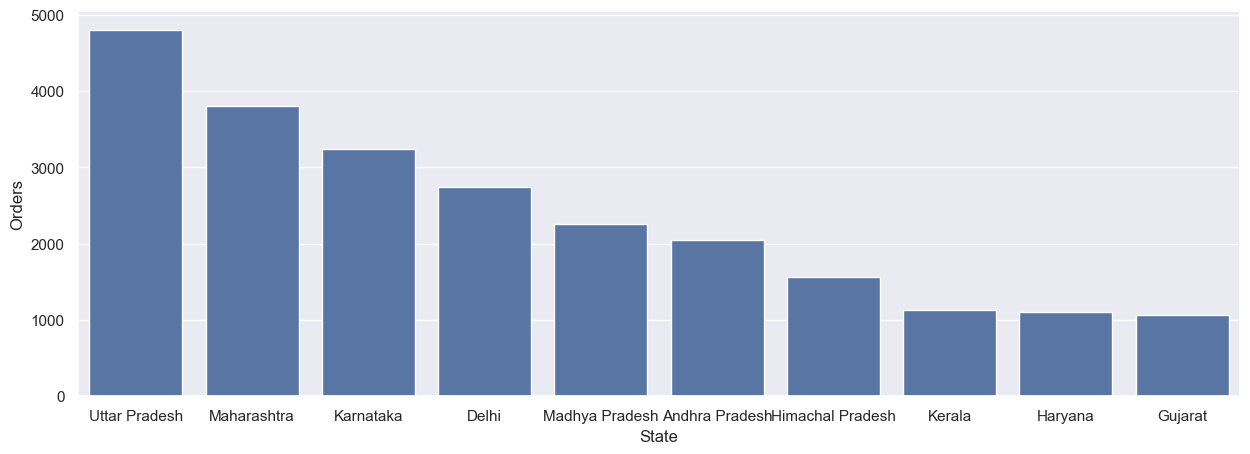

In [67]:
#total no of orders from Top 10 states
sales_state_O =df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state_O,x= 'State',y='Orders')

In [68]:
#Total sales amount from Top 10 states
sales_state_A = df.groupby(['State'],as_index =False)['Amount'].sum().sort_values(by= ['Amount'],ascending=False)
sales_state_A

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

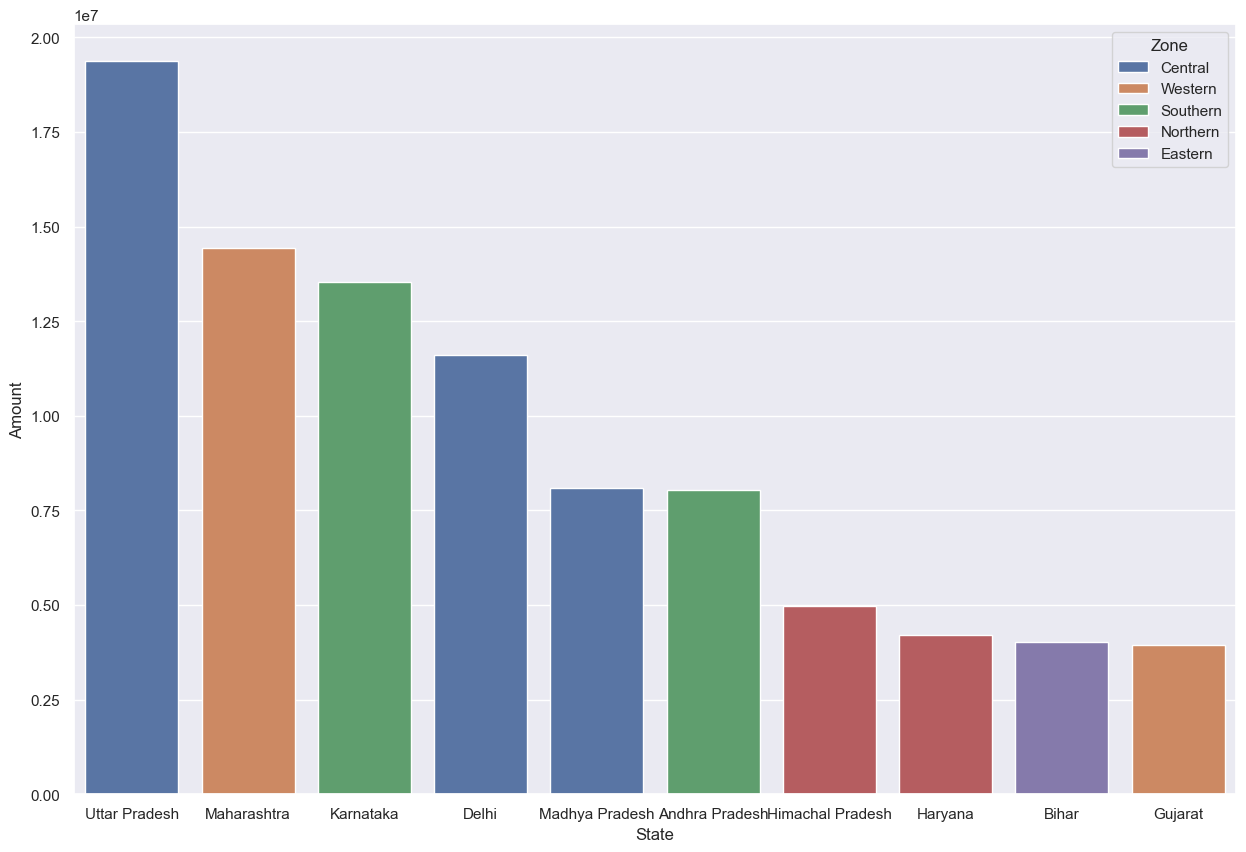

In [121]:
sales_state_A = df.groupby(['State','Zone'],as_index =False)['Amount'].sum().sort_values(by= ['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=sales_state_A, x='State',y='Amount',hue='Zone')

#From above graphs we can see that most of the orders & total sales amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

<Axes: xlabel='Zone', ylabel='Amount'>

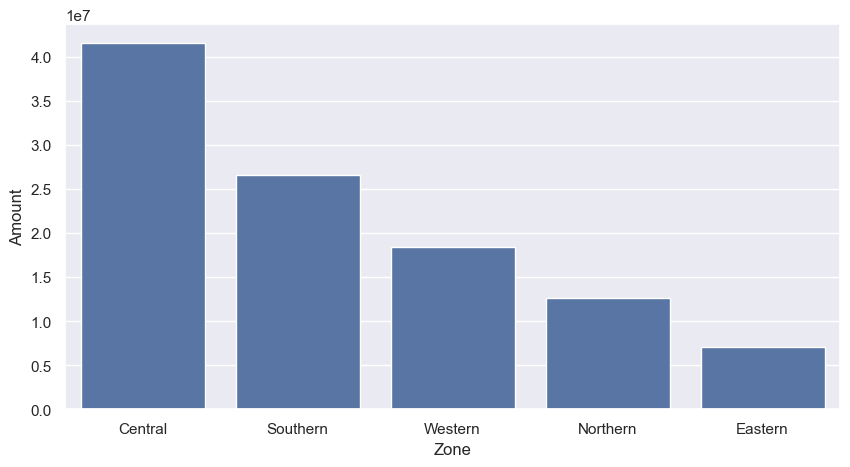

In [111]:
sales_zone = df.groupby(['Zone'],as_index =False)['Amount'].sum().sort_values(by= ['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=sales_zone, x='Zone',y='Amount')

#From above graphs we can see that most of the  total sales amount are from central zone



In [70]:
#Maritial Status

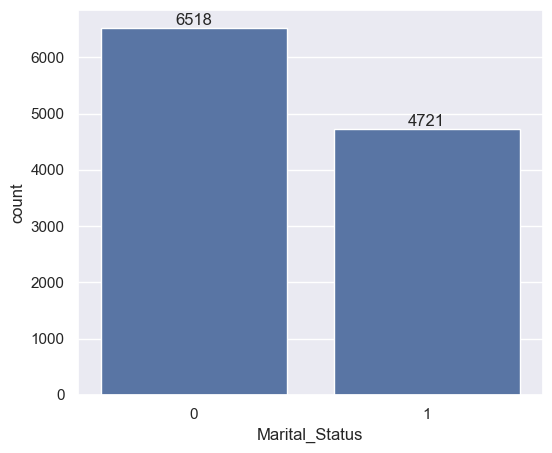

In [74]:
ax= sns.countplot(data=df, x= 'Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)



<Axes: xlabel='Marital_Status', ylabel='Amount'>

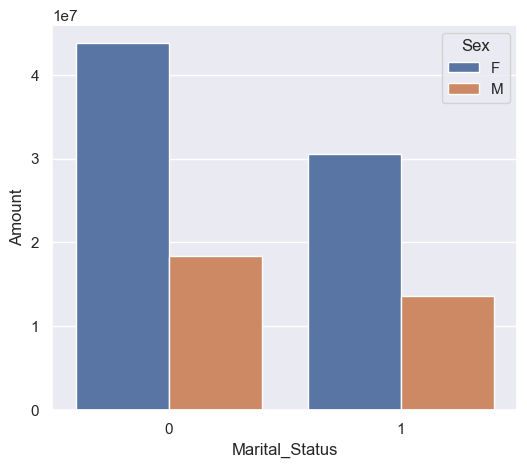

In [73]:
sales_state = df.groupby(['Marital_Status', 'Sex'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Sex')

#From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

#occupation

In [75]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\SNEHAL\AppData\Local\Temp\ipykernel_43284\1867611185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Occupation',data =df,palette=color_palette)


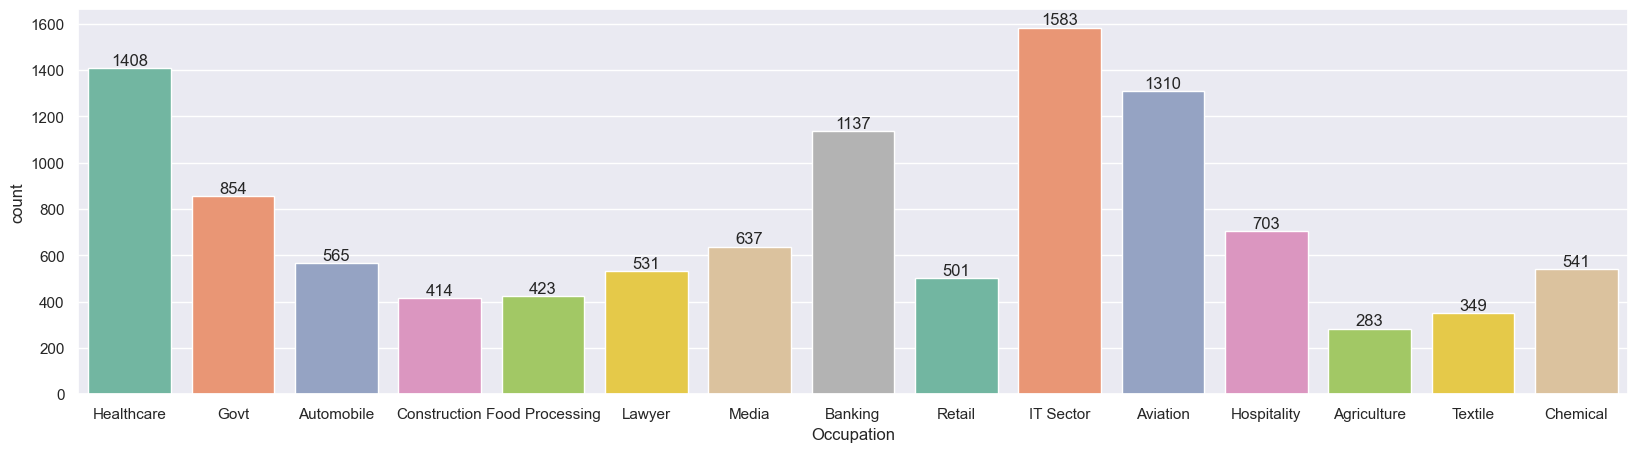

In [84]:
sns.set(rc={'figure.figsize':(20,5)})
color_palette = 'Set2'
ax=sns.countplot(x='Occupation',data =df,palette=color_palette)
for bars in ax.containers:
    ax.bar_label(bars)



C:\Users\SNEHAL\AppData\Local\Temp\ipykernel_43284\1769009995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_op, x='Occupation',y='Amount',palette=color_palette)


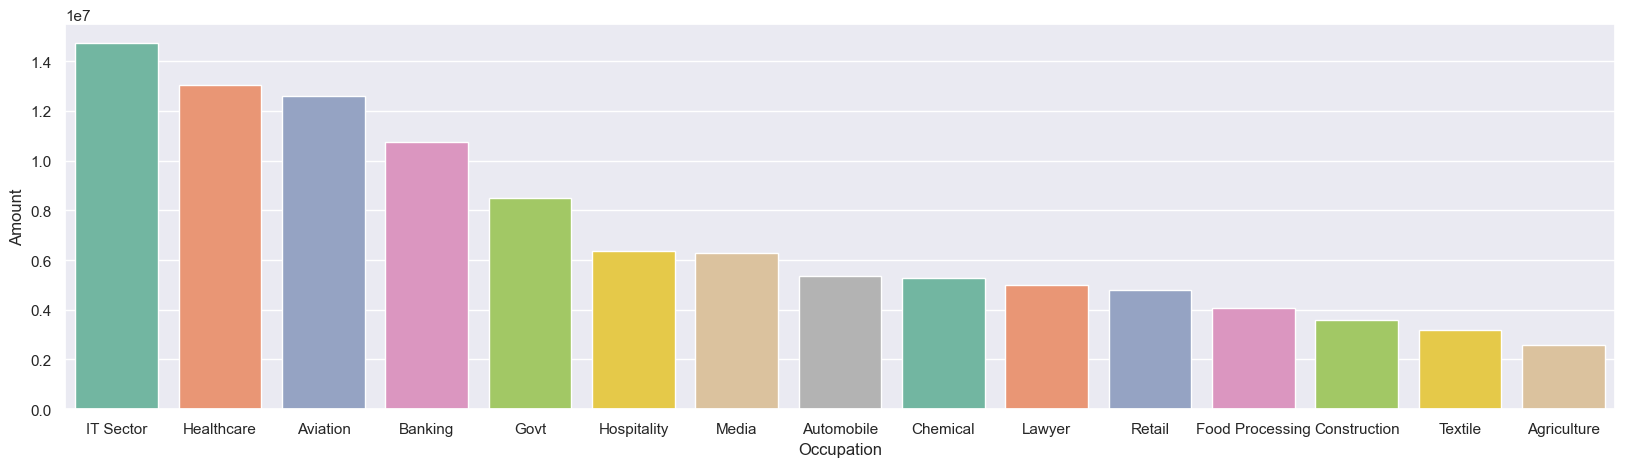

In [92]:
sales_op=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
color_palette = 'Set2'
ax=sns.barplot(data=sales_op, x='Occupation',y='Amount',palette=color_palette)

#From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

#Product category

C:\Users\SNEHAL\AppData\Local\Temp\ipykernel_43284\3015785382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Product_Category',palette=color_palette)


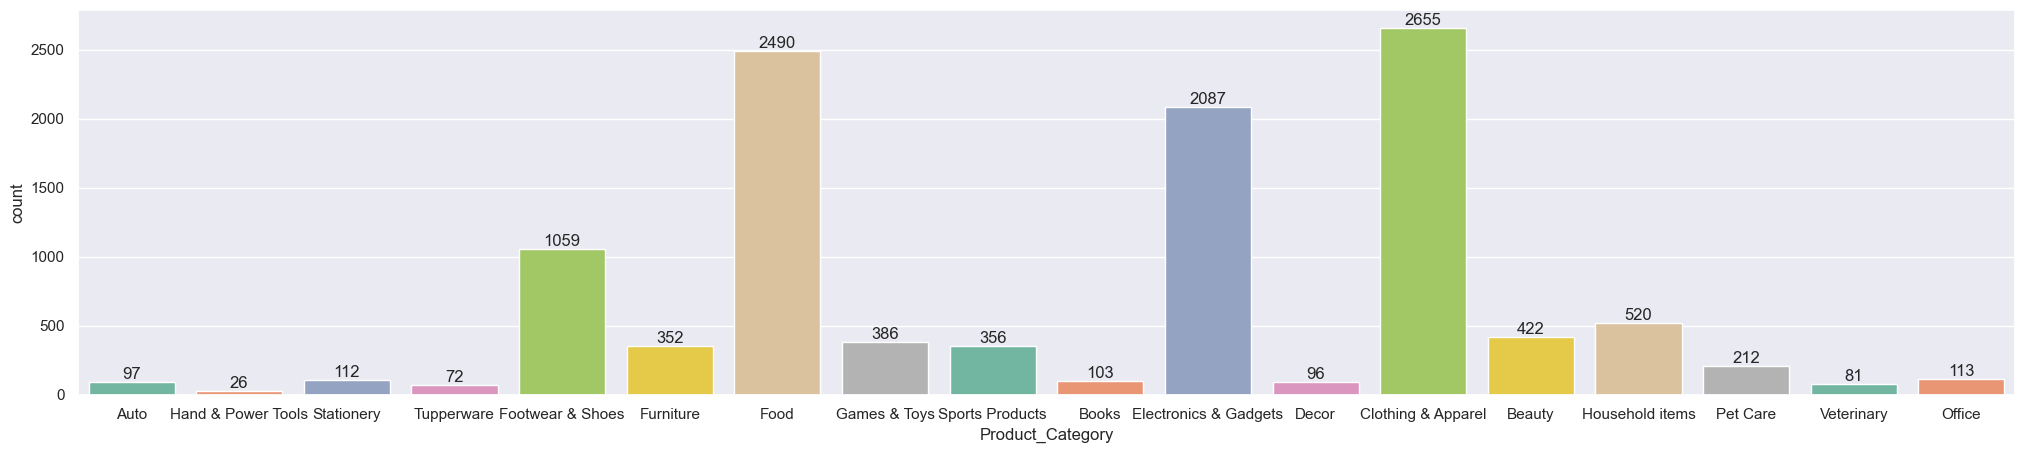

In [97]:
sns.set(rc={'figure.figsize':(25,5)})
color_palette = 'Set2'
ax=sns.countplot(data=df, x='Product_Category',palette=color_palette)
for bars in ax.containers:
    ax.bar_label(bars)

In [98]:
df.head(10)

,User_ID,Cust_name,Product_ID,Sex,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


<Axes: xlabel='Product_Category', ylabel='Amount'>

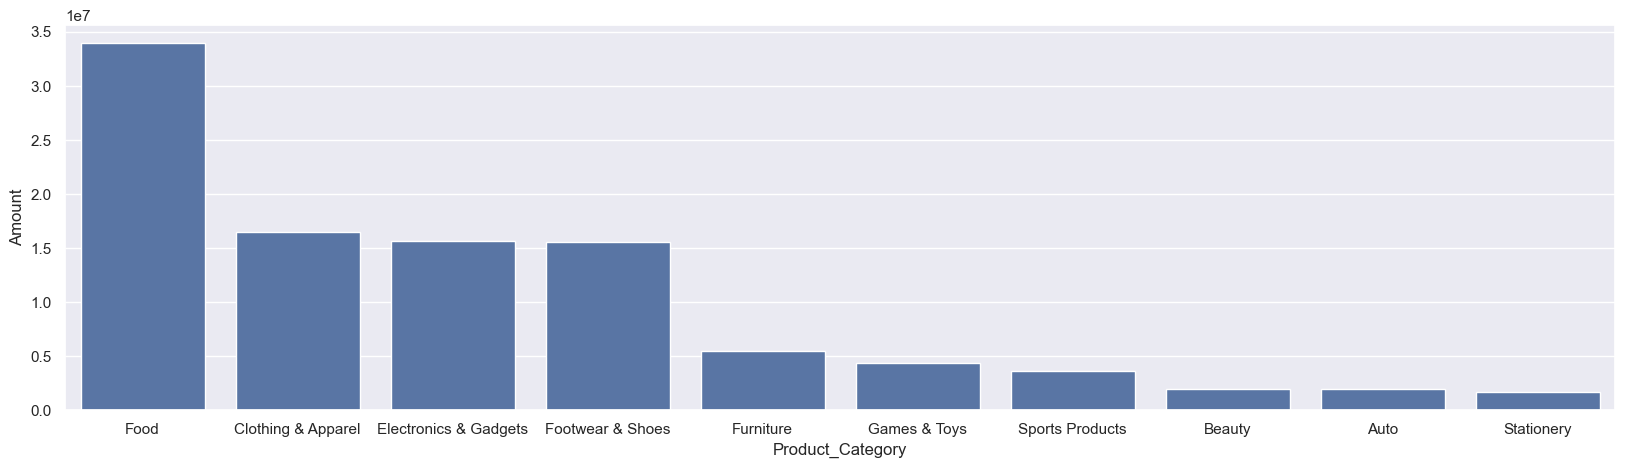

In [122]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')


#From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

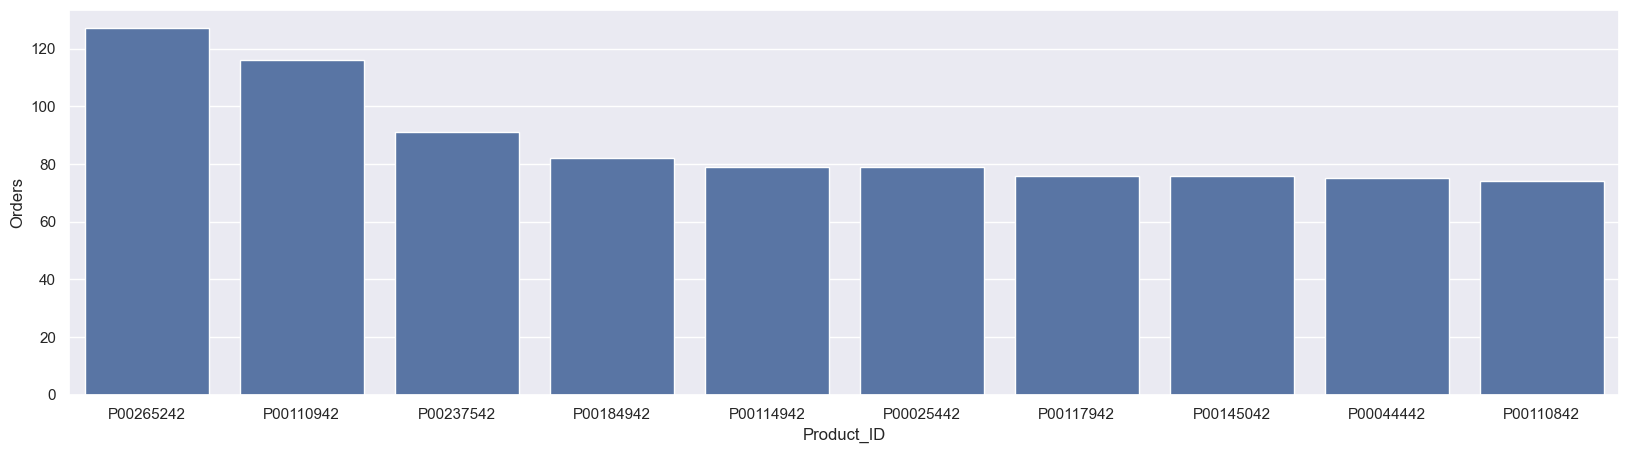

In [123]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

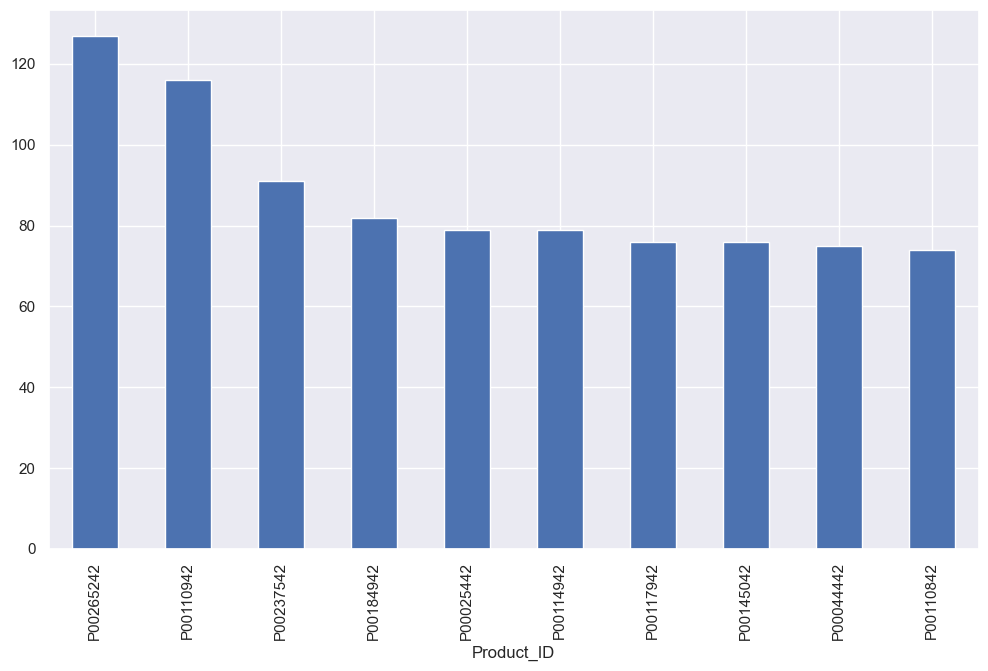

In [124]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

#Conclusion:
#Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category